In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

In [2]:
#Read the Whale Portfolio daily returns and clean the data
whale_returns_csv = Path("whale_returns.csv")

In [3]:
whale_df = pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_df.dropna(inplace=True)

In [6]:
#Read the algorithmic daily returns and clean the data
algo_returns_csv = Path("algo_returns.csv")
algo_df = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_df.dropna(inplace=True)

In [9]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history_csv = Path("sp_tsx_history.csv")
sp_tsx_df = pd.read_csv(sp_tsx_history_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp_tsx_df.sort_index(inplace=True)
sp_tsx_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [10]:
# Check Data Types
sp_tsx_df.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types
sp_tsx_df['Close'] = sp_tsx_df['Close'].replace(r'[$,]','',regex=True).astype('float64')
sp_tsx_df.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [12]:
# Calculate Daily Returns
sp_tsx_daily_returns = sp_tsx_df.pct_change()
sp_tsx_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [13]:
# Drop nulls
sp_tsx_daily_returns.isnull().sum()
sp_tsx_daily_returns.dropna(inplace=True)

In [14]:
# Rename `Close` Column to be specific to this portfolio
sp_tsx_daily_returns.columns=["SP TSX 60"]
sp_tsx_daily_returns.head()

,SP TSX 60
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame
portfolio_returns = pd.concat([whale_df, algo_df, sp_tsx_daily_returns], axis="columns", join="inner")
portfolio_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP TSX 60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


<AxesSubplot:xlabel='Date'>

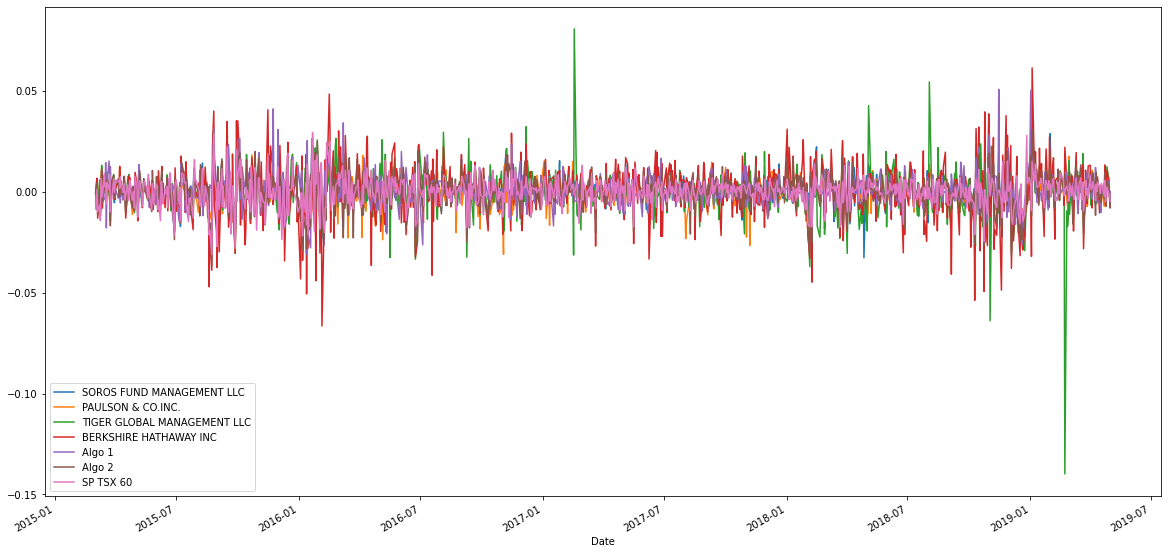

In [16]:
# Plot daily returns of all portfolios
portfolio_returns.plot(figsize=(20,10))

In [17]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + portfolio_returns).cumprod() - 1
cumulative_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP TSX 60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.000962,-0.001755,-0.003028,-0.002383,-0.010514,0.001464,-0.011872
2015-03-05,0.004981,0.002314,-0.000681,0.004327,-0.011459,0.005794,-0.010544
2015-03-06,-0.002963,-0.001269,-0.009156,-0.008828,-0.016359,-0.005733,-0.020411
2015-03-09,-0.002383,0.002951,-0.003367,-0.010466,-0.021717,-0.004437,-0.026832


<AxesSubplot:xlabel='Date'>

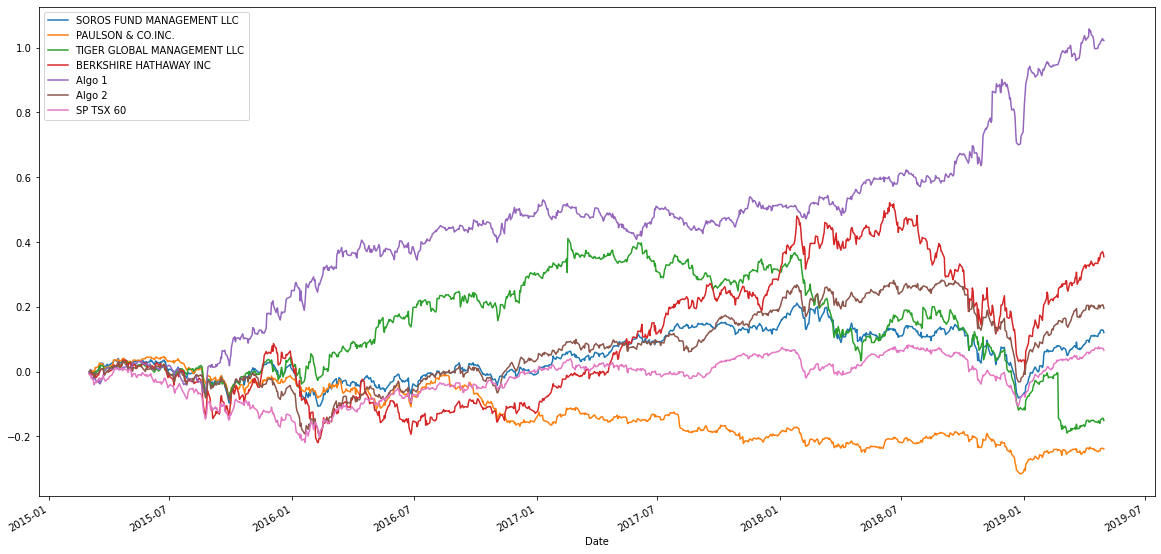

In [18]:
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10))

<AxesSubplot:>

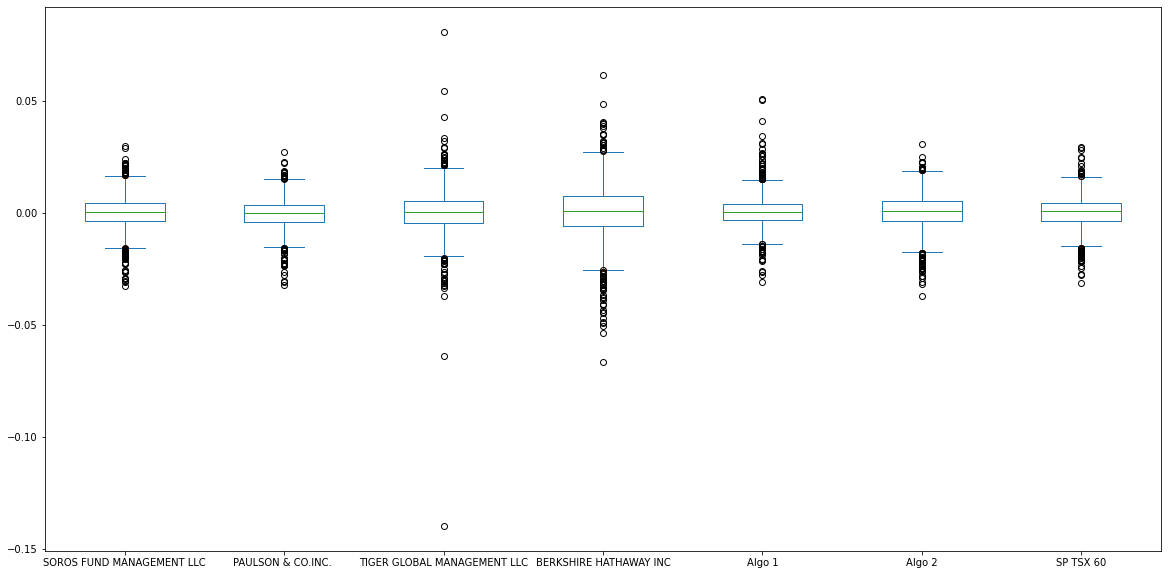

In [19]:
# Box plot to visually show risk
portfolio_returns.plot.box(figsize=(20,10))

In [20]:
# Calculate the daily standard deviations of all portfolios
portfolio_std = portfolio_returns.std()
portfolio_std

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
SP TSX 60                      0.007034
dtype: float64

In [21]:
# Calculate the daily standard deviation of S&P TSX 60
portfolio_std['SP TSX 60']
 
# Determine which portfolios are riskier than the S&P TSX 60
(portfolio_std['SP TSX 60']<portfolio_std)

SOROS FUND MANAGEMENT LLC       True
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                          True
Algo 2                          True
SP TSX 60                      False
dtype: bool

In [22]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = portfolio_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
SP TSX 60                      0.111664
dtype: float64

<AxesSubplot:xlabel='Date'>

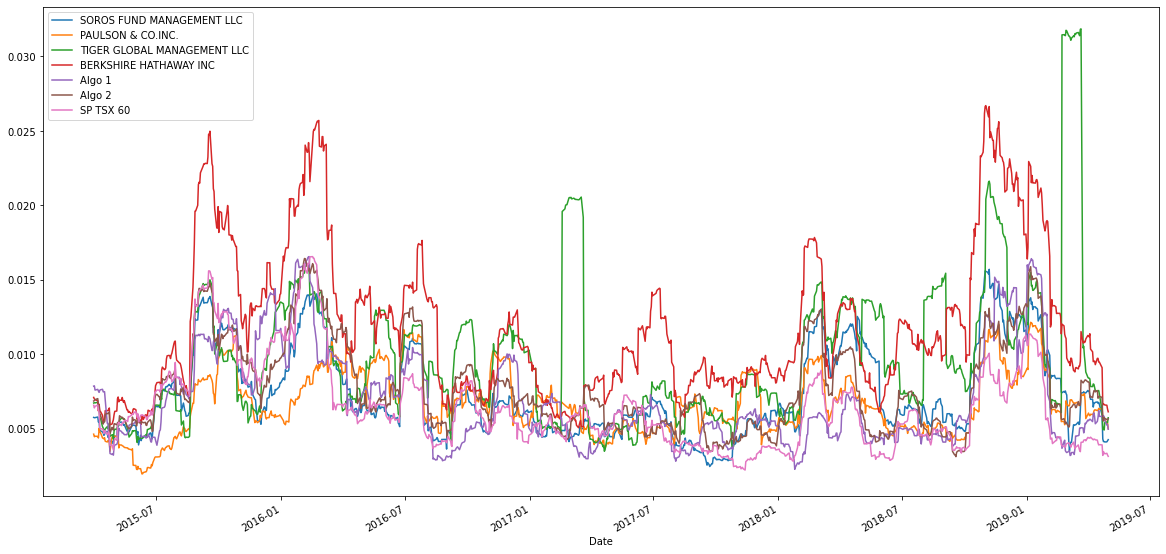

In [23]:
# Calculate & Plot the rolling standard deviation for all portfolios using a 21-day window
portfolio_returns.rolling(window=21).std().plot(figsize=[20,10])

In [24]:
#Calculate & plot the correlation
portfolio_correlation = portfolio_returns.corr()
portfolio_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP TSX 60
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
SP TSX 60,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


<AxesSubplot:title={'center':'Rolling 60-Day Beta of SOROS FUND MANAGEMENT LLC'}, xlabel='Date'>

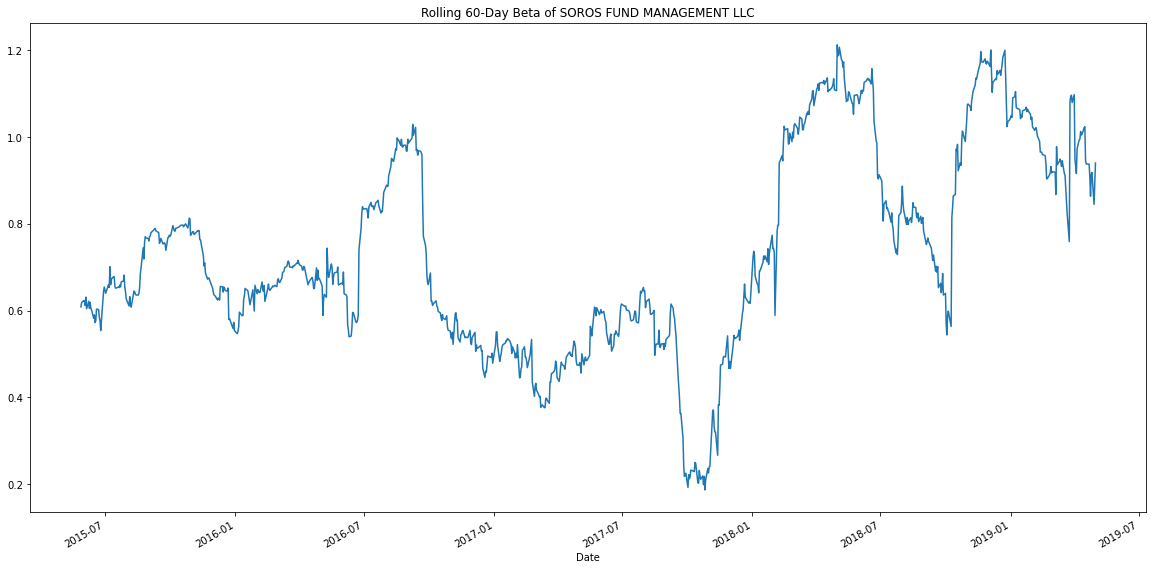

In [25]:
# Calculate covariance of a single portfolio
covariance = portfolio_returns['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(portfolio_returns['SP TSX 60'])

# Calculate variance of S&P TSX
variance = portfolio_returns['SP TSX 60'].rolling(window=60).var()

# Computing beta
soros_beta = covariance / variance

# Plot beta trend
soros_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of SOROS FUND MANAGEMENT LLC')

In [26]:
# Use `ewm` to calculate the rolling window
portfolio_returns.ewm(halflife=21).std().head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP TSX 60
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.003648
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.004936
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.005205
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.004517


In [27]:
# Annualized Sharpe Ratios
sharpe_ratios = (portfolio_returns.mean() * 252) / (portfolio_returns.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
SP TSX 60                      0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratio'}>

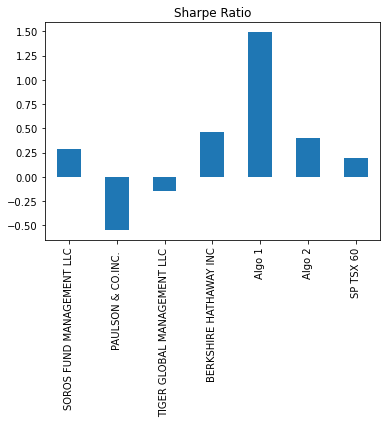

In [28]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', title='Sharpe Ratio')

In [29]:
# Reading data from 1st stock
otex_csv = Path('otex_historical.csv')
otex_df = pd.read_csv(otex_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
otex_df.head()

,Symbol,Close
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16


In [30]:
# Reading data from 2nd stock
lstock_csv = Path("lstock_historical.csv")
lstock_df = pd.read_csv(lstock_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
lstock_df.head()

,Symbol,Close
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86


In [31]:
# Reading data from 3rd stock
shop_csv = Path("shop_historical.csv")
shop_df = pd.read_csv(shop_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
shop_df.head()

,Symbol,Close
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51


In [32]:
# Combine all stocks in a single DataFrame
custom_portfolio = pd.concat([otex_df, lstock_df, shop_df], axis="columns", join="inner")
custom_portfolio.head()

,Symbol,Close,Symbol,Close,Symbol,Close
Date,,,,,,
2018-01-02,OTEX,43.58,L,57.99,SHOP,132.06
2018-01-03,OTEX,43.07,L,57.41,SHOP,135.15
2018-01-04,OTEX,42.91,L,57.42,SHOP,137.46
2018-01-05,OTEX,42.57,L,57.42,SHOP,137.26
2018-01-08,OTEX,42.16,L,56.86,SHOP,139.51


In [33]:
#Reset Index
custom_portfolio.drop(columns=['Symbol'], inplace=True)
custom_portfolio.head()

,Close,Close,Close
Date,,,
2018-01-02,43.58,57.99,132.06
2018-01-03,43.07,57.41,135.15
2018-01-04,42.91,57.42,137.46
2018-01-05,42.57,57.42,137.26
2018-01-08,42.16,56.86,139.51


In [34]:
#Reorganize portfolio data by having a column per symbol
custom_portfolio.columns = ['OTEX', 'L', 'SHOP']
custom_portfolio.head()

,OTEX,L,SHOP
Date,,,
2018-01-02,43.58,57.99,132.06
2018-01-03,43.07,57.41,135.15
2018-01-04,42.91,57.42,137.46
2018-01-05,42.57,57.42,137.26
2018-01-08,42.16,56.86,139.51


In [35]:
# Calculate daily returns
custom_returns = custom_portfolio.pct_change()
custom_returns.head()

# Drop NAs
custom_returns.dropna(inplace=True)

#Display sample data
custom_returns.head()

,OTEX,L,SHOP
Date,,,
2018-01-03,-0.011703,-0.010002,0.023398
2018-01-04,-0.003715,0.000174,0.017092
2018-01-05,-0.007924,0.000000,-0.001455
2018-01-08,-0.009631,-0.009753,0.016392
2018-01-09,-0.000712,0.008969,-0.011254


In [36]:
# Set weights
weights = [1/3, 1/3, 1/3]
weighted_returns = custom_returns.dot(weights)
weighted_returns.head()

Date
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
2018-01-09   -0.000999
dtype: float64

In [37]:
#Cumulative returns
cumulative_returns1 = (1 + weighted_returns).cumprod() - 1
cumulative_returns1.head()

Date
2018-01-03    0.000565
2018-01-04    0.005084
2018-01-05    0.001942
2018-01-08    0.000943
2018-01-09   -0.000056
dtype: float64

In [38]:
# Join your returns DataFrame to the original returns DataFrame
new_portfolio = pd.concat([weighted_returns, whale_df, sp_tsx_daily_returns], axis="columns", join="inner")
new_portfolio.rename(columns={0:'CUSTOM PORTFOLIO'}, inplace=True)
new_portfolio.head()

,CUSTOM PORTFOLIO,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP TSX 60
Date,,,,,,
2018-01-03,0.000565,0.004658,0.000027,0.001979,0.005676,0.003774
2018-01-04,0.004517,-0.000914,0.004196,0.010743,0.004065,0.002528
2018-01-05,-0.003126,0.004072,0.000823,0.000737,0.022023,-0.003869
2018-01-08,-0.000997,0.004473,-0.003739,0.005085,0.003435,-0.001944
2018-01-09,-0.000999,-0.001028,0.000872,0.001789,0.000708,0.000097


In [39]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
new_portfolio.dropna(inplace=True)
new_portfolio.head()

,CUSTOM PORTFOLIO,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP TSX 60
Date,,,,,,
2018-01-03,0.000565,0.004658,0.000027,0.001979,0.005676,0.003774
2018-01-04,0.004517,-0.000914,0.004196,0.010743,0.004065,0.002528
2018-01-05,-0.003126,0.004072,0.000823,0.000737,0.022023,-0.003869
2018-01-08,-0.000997,0.004473,-0.003739,0.005085,0.003435,-0.001944
2018-01-09,-0.000999,-0.001028,0.000872,0.001789,0.000708,0.000097


In [40]:
# Calculate the annualized `std`
annual_std = new_portfolio * np.sqrt(252)
annual_std

,CUSTOM PORTFOLIO,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP TSX 60
Date,,,,,,
2018-01-03,0.008964,0.073936,0.000430,0.031413,0.090108,0.059916
2018-01-04,0.071707,-0.014515,0.066617,0.170537,0.064527,0.040133
2018-01-05,-0.049627,0.064634,0.013069,0.011695,0.349600,-0.061417
2018-01-08,-0.015830,0.071000,-0.059350,0.080723,0.054528,-0.030867
2018-01-09,-0.015853,-0.016311,0.013847,0.028401,0.011244,0.001547
...,...,...,...,...,...,...
2019-04-25,0.054942,-0.004522,-0.020491,-0.081804,0.076956,-0.009973
2019-04-26,0.051484,0.129369,0.145437,0.196127,0.165633,0.035779
2019-04-29,0.052435,0.019912,0.043165,0.099226,0.082917,-0.012508


<AxesSubplot:xlabel='Date'>

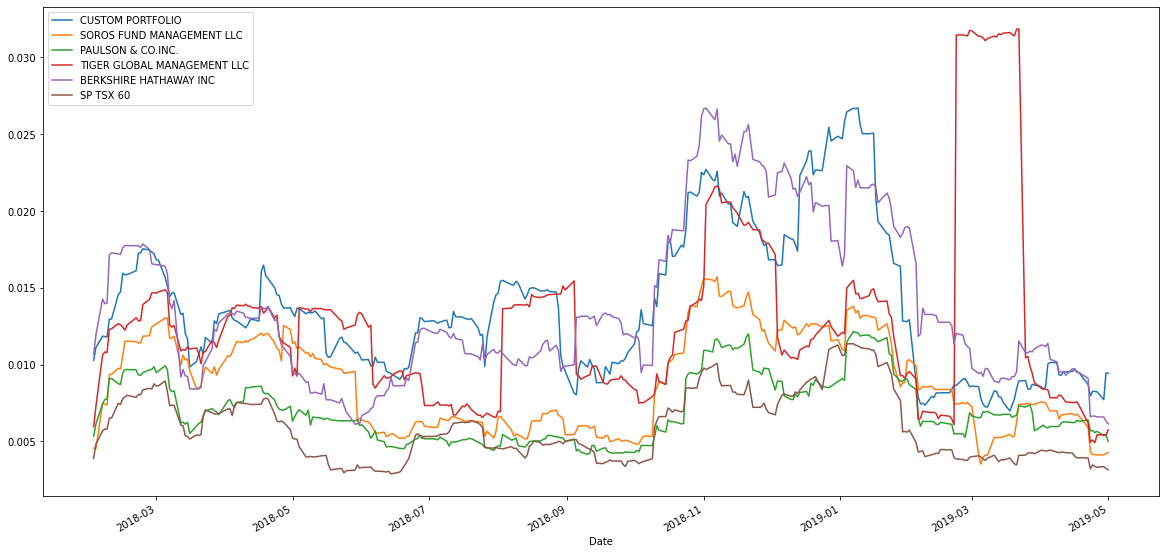

In [41]:
# Calculate and plot rolling std with 21-day window
new_portfolio.rolling(window=21).std().plot(figsize=[20,10])

In [42]:
# Calculate and plot the correlation
new_portfolio_correlation = new_portfolio.corr()
new_portfolio_correlation

,CUSTOM PORTFOLIO,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP TSX 60
CUSTOM PORTFOLIO,1.000000,0.556093,0.385305,0.303971,0.647413,0.579228
SOROS FUND MANAGEMENT LLC,0.556093,1.000000,0.764174,0.526710,0.782414,0.686681
PAULSON & CO.INC.,0.385305,0.764174,1.000000,0.536534,0.647407,0.623728
TIGER GLOBAL MANAGEMENT LLC,0.303971,0.526710,0.536534,1.000000,0.384316,0.438781
BERKSHIRE HATHAWAY INC,0.647413,0.782414,0.647407,0.384316,1.000000,0.649817
SP TSX 60,0.579228,0.686681,0.623728,0.438781,0.649817,1.000000


<AxesSubplot:>

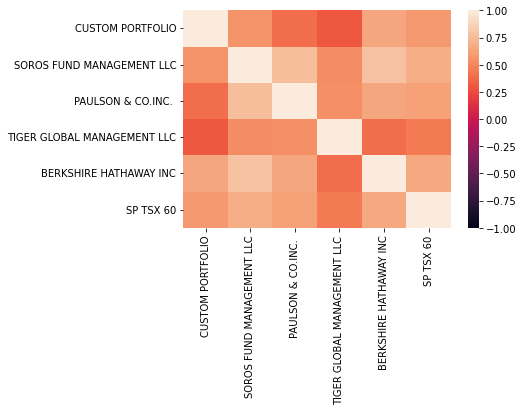

In [44]:
# Plot
sns.heatmap(new_portfolio_correlation, vmin=-1, vmax=1)

<AxesSubplot:title={'center':'Rolling 60-Day Beta of CUSTOM PORTFOLIO'}, xlabel='Date'>

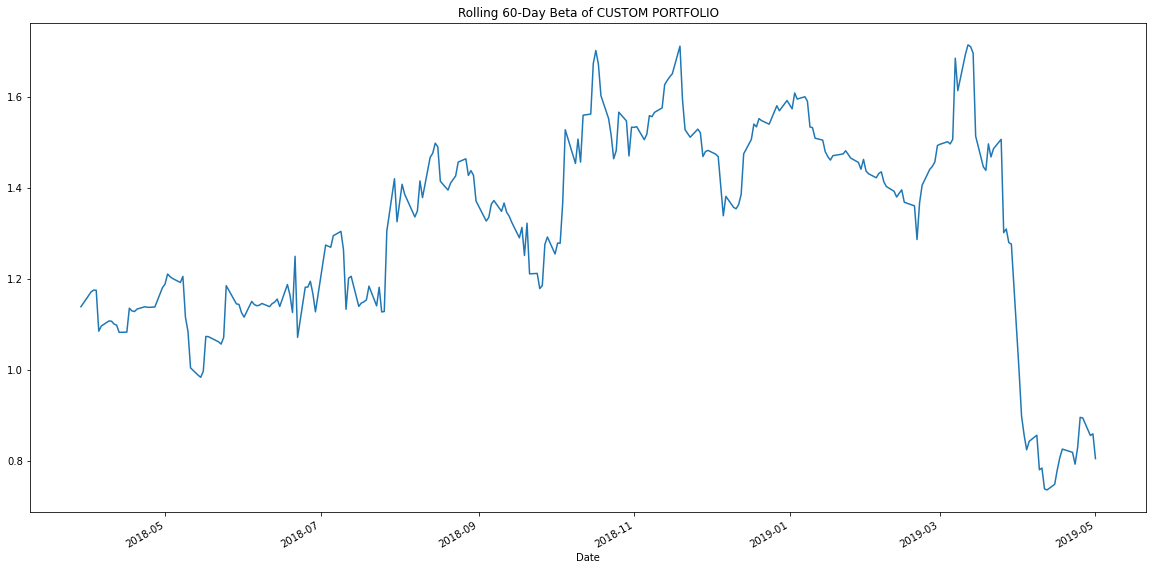

In [45]:
#Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX
covariance_new = new_portfolio['CUSTOM PORTFOLIO'].rolling(window=60).cov(portfolio_returns['SP TSX 60'])
variance_new = new_portfolio['SP TSX 60'].rolling(window=60).var()
beta_new = covariance_new/variance_new
beta_new.plot(figsize=(20, 10), title='Rolling 60-Day Beta of CUSTOM PORTFOLIO')

In [46]:
# Calculate Annualized Sharpe Ratios
annual_sharpe = (custom_portfolio.mean() * 252) / (custom_portfolio.std() * np.sqrt(252))
annual_sharpe

OTEX    172.208435
L       153.128206
SHOP     37.439396
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratio'}>

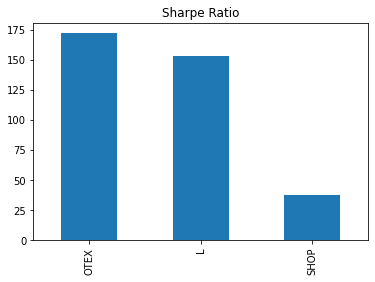

In [47]:
# Visualize the sharpe ratios as a bar plot
annual_sharpe.plot(kind='bar', title='Sharpe Ratio')

In [ ]:
# How does your portfolio do?
# From March 2018 the portfolio has a constant growth trend with few decline around certain months.
# Although, during the month of April 2019 a huge decreasing trend noticed indicating negative returns.
# Compared to the whales portfolio the custom portfolio provide similar returns. 